In [1]:
from os import listdir, path
import cv2
import numpy as np
from main import Recognizer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import random

/home/husen/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
base_directory = "/home/husen/SE - 4 - 1/MAI/Attendance/attendance/attendance/recognition/"

In [3]:
def prepare_data(directory):
    labels = sorted([label for label in listdir(directory) if label != "Tiruzer Tsedeke"])
    label_image, images, encoded_labels, label_mapping = [], [], [], {}

    for i, label in enumerate(labels):
        if label == "Tiruzer Tsedeke":
            continue
        
        done = False
        label_mapping[i] = label
        dir_path = path.join(directory, label)
        if len(listdir(dir_path)) > 10:
            print(f"Too many images in {label}: {len(listdir(dir_path))}. Skipping...")
        
        elif len(listdir(dir_path)) < 10:
            print(f"Too few images in {label}: {len(listdir(dir_path))}. Skipping...")

        for im_file in sorted(listdir(dir_path)):
            image = cv2.imread(path.join(dir_path, im_file))
            
            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
            detected_face = face_cascade.detectMultiScale(image, scaleFactor=1.3, minNeighbors=5)

            for x, y, w, h in detected_face:
                face = image[y:y + h, x:x + w]
                face = cv2.resize(face, (200, 200))

                gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
                denoised_image = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
                flattened_image = denoised_image.flatten()

                encoded_labels.append(i)
                images.append(flattened_image)
                if not done:
                    label_image.append(flattened_image)
                    done = True

    return np.vstack(label_image), np.vstack(images), np.hstack(encoded_labels), label_mapping

In [4]:
label_image, images, labels, label_dict = prepare_data(path.join(base_directory, 'AI Students Picture'))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1)

In [6]:
print(label_dict)

{0: 'Abdissa Degefu', 1: 'Abdurahman Muhammed', 2: 'Abraham Wendmeneh', 3: 'Amanuel Beyene', 4: 'Amir Ahmedin', 5: 'Ananiya_Tesfahun', 6: 'Betelhem Yimam', 7: 'Bethelhem Yemane', 8: 'Biniyam Haile', 9: 'Dagmawi_Tensay', 10: 'Dawit Getahun', 11: 'Dawit_Abebe', 12: 'Deribew_Shimels', 13: 'Ephrem_Shimels', 14: 'Esayas Nigussie', 15: 'Etsubdink Awoke', 16: 'Fasika_Fikadu', 17: 'Feven Tesfaye', 18: 'Fraol Mulugeta', 19: 'Gedion Ezra', 20: 'Geleta Daba', 21: 'Gelila Moges', 22: 'Gelila Tefera', 23: 'Husen Yusuf', 24: 'Kidus Hunegnaw', 25: 'Leul Degarege', 26: 'Leul Wujira', 27: 'Mariam Yohannes', 28: 'Melkishi Tesfaye', 29: 'Metsakal Zeleke', 30: 'Milion Tolesa', 31: 'Milka Fasika', 32: 'Naol Taye', 33: 'Nathnael Dereje', 34: 'Olyad Temesgen', 35: 'Sahib Semahegn', 36: 'Semir Hamid', 37: 'Shemsu Nurye', 38: 'Sosina Esayas', 39: 'Tewodros Berhanu', 40: 'Tinsae Shemalise', 41: 'Yanet Mekuria', 42: 'Yohannes Ahunm', 43: 'Yohannes Dessie', 44: 'Yohannes Desta', 45: 'Yonas Engedu', 46: 'Yosef Awe

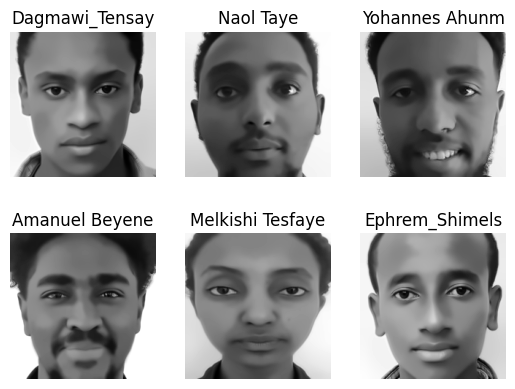

In [7]:
for i in range(6):
    num = random.randint(0, len(X_train))
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[num].reshape(200, 200), cmap='gray')
    plt.title(label_dict[y_train[num]])
    plt.axis('off')
plt.show()

In [8]:
recognizer = Recognizer(labels, label_dict)

In [9]:
print("Training the model...")
recognizer.fit(X_train, y_train)
print("Model trained successfully")

Training the model...


/home/husen/SE - 4 - 1/MAI/Attendance/attendance/attendance/recognition/lda.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
  self.subspace_basis = eigvecs.astype(np.float64)


Model trained successfully


Predicted: Amir Ahmedin, Actual: Amir Ahmedin


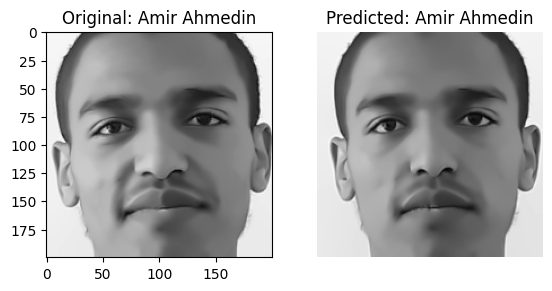

Predicted: Husen Yusuf, Actual: Husen Yusuf


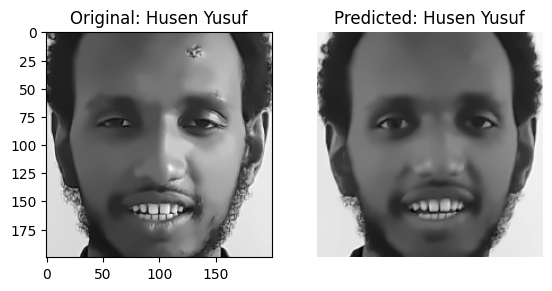

Predicted: Yosef Aweke, Actual: Yosef Aweke


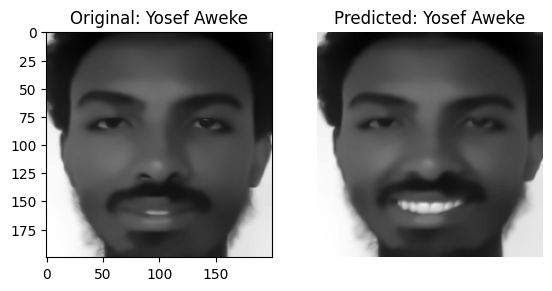

Predicted: Yohannes Desta, Actual: Yohannes Desta


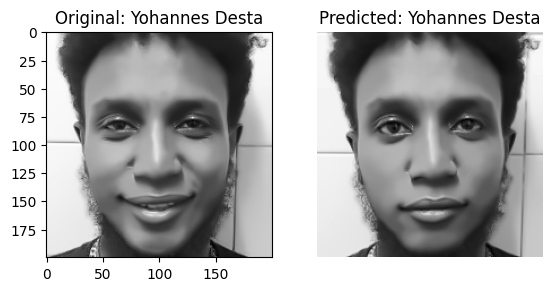

Predicted: Amanuel Beyene, Actual: Amanuel Beyene


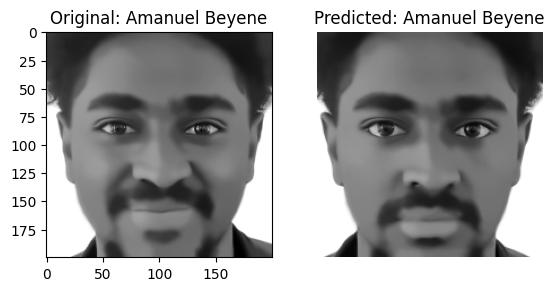

Predicted: Melkishi Tesfaye, Actual: Nathnael Dereje


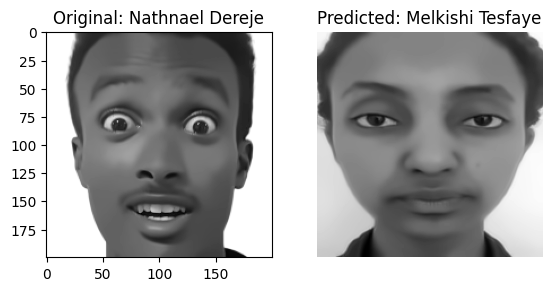

In [10]:
for i in range(6):
    num = random.randint(0, len(X_test) - 1)
    predicted_label = recognizer.predict(X_test[num])[1]
    actual_label = y_test[num]
    label = labels[predicted_label]
    print(f"Predicted: {label_dict[predicted_label]}, Actual: {label_dict[actual_label]}")
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[num].reshape(200, 200), cmap='gray')
    plt.title(f"Original: {label_dict[y_test[num]]}")

    plt.subplot(1, 2, 2)
    plt.imshow(label_image[predicted_label].reshape(200, 200), cmap='gray')
    plt.title(f"Predicted: {label_dict[predicted_label]}")
    plt.axis('off')
    plt.show()

In [11]:
def score(X_test, y_test, recognizer, label_dict):
    correct = 0
    for i, img in enumerate(X_test):
        _, predicted_label, _ = recognizer.predict(img)
        if predicted_label == y_test[i]:
            correct += 1
        else:
            print(f"Test Label: {label_dict[y_test[i]]}")
            print(f"Predicted Label: {label_dict[predicted_label]}")

    return correct / len(X_test)

In [12]:
print(score(X_test, y_test, recognizer, label_dict))

Test Label: Yanet Mekuria
Predicted Label: Mariam Yohannes
Test Label: Semir Hamid
Predicted Label: Geleta Daba
Test Label: Nathnael Dereje
Predicted Label: Yanet Mekuria
Test Label: Abdissa Degefu
Predicted Label: Fraol Mulugeta
Test Label: Dawit_Abebe
Predicted Label: Gedion Ezra
Test Label: Naol Taye
Predicted Label: Dawit Getahun
Test Label: Yosef Muluneh
Predicted Label: Yohannes Ahunm
Test Label: Gedion Ezra
Predicted Label: Deribew_Shimels
Test Label: Nathnael Dereje
Predicted Label: Melkishi Tesfaye
Test Label: Milion Tolesa
Predicted Label: Amanuel Beyene
Test Label: Naol Taye
Predicted Label: Biniyam Haile
Test Label: Shemsu Nurye
Predicted Label: Abraham Wendmeneh
Test Label: Ephrem_Shimels
Predicted Label: Dawit Getahun
Test Label: Dawit_Abebe
Predicted Label: Geleta Daba
Test Label: Etsubdink Awoke
Predicted Label: Mariam Yohannes
Test Label: Gedion Ezra
Predicted Label: Yohannes Ahunm
0.8333333333333334


In [13]:
# save the labels and label_dict in a file
np.save('models/labels.npy', labels)
np.save('models/label_dict.npy', label_dict)